import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

load dataset

In [6]:
df = pd.read_csv('POWERGRID.csv')
df.head()
# df.shape

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-10-05,POWERGRID,EQ,52.00,89.8,109.50,83.15,100.20,100.60,102.49,481058927,4.930561e+15,NaN,181390171,0.3771
1,2007-10-08,POWERGRID,EQ,100.60,104.0,104.00,94.85,95.30,95.45,98.12,71252858,6.991616e+14,NaN,22115293,0.3104
2,2007-10-09,POWERGRID,EQ,95.45,95.5,102.85,90.35,102.10,101.95,98.57,65658228,6.471784e+14,NaN,16991920,0.2588
3,2007-10-10,POWERGRID,EQ,101.95,104.6,105.00,102.00,102.65,102.90,103.66,38211410,3.960887e+14,NaN,16409289,0.4294
4,2007-10-11,POWERGRID,EQ,102.90,120.0,120.00,102.00,114.85,114.40,110.78,59805552,6.625235e+14,NaN,17530826,0.2931


analyze data

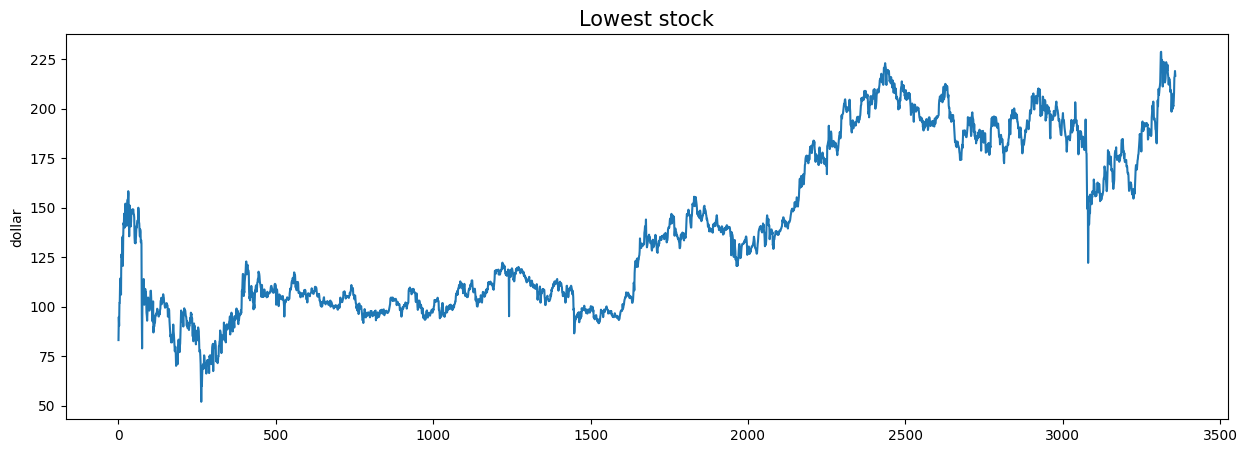

In [8]:
plt.figure(figsize=(15,5))
plt.plot(df['Low'])
plt.title('Lowest stock', fontsize=15)
plt.ylabel('dollar')
plt.show()